<a href="https://colab.research.google.com/github/aravindan155/AKumaranProjects/blob/main/Copy_of_Tesla_Stock_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the tesla_stock_data_2000_2025.csv file...


Saving tesla_stock_data_2000_2025.csv to tesla_stock_data_2000_2025 (1).csv
File uploaded: tesla_stock_data_2000_2025 (1).csv

First 5 rows of the data:
         Date     Close      High       Low      Open     Volume
0  2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1  2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2  2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3  2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4  2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


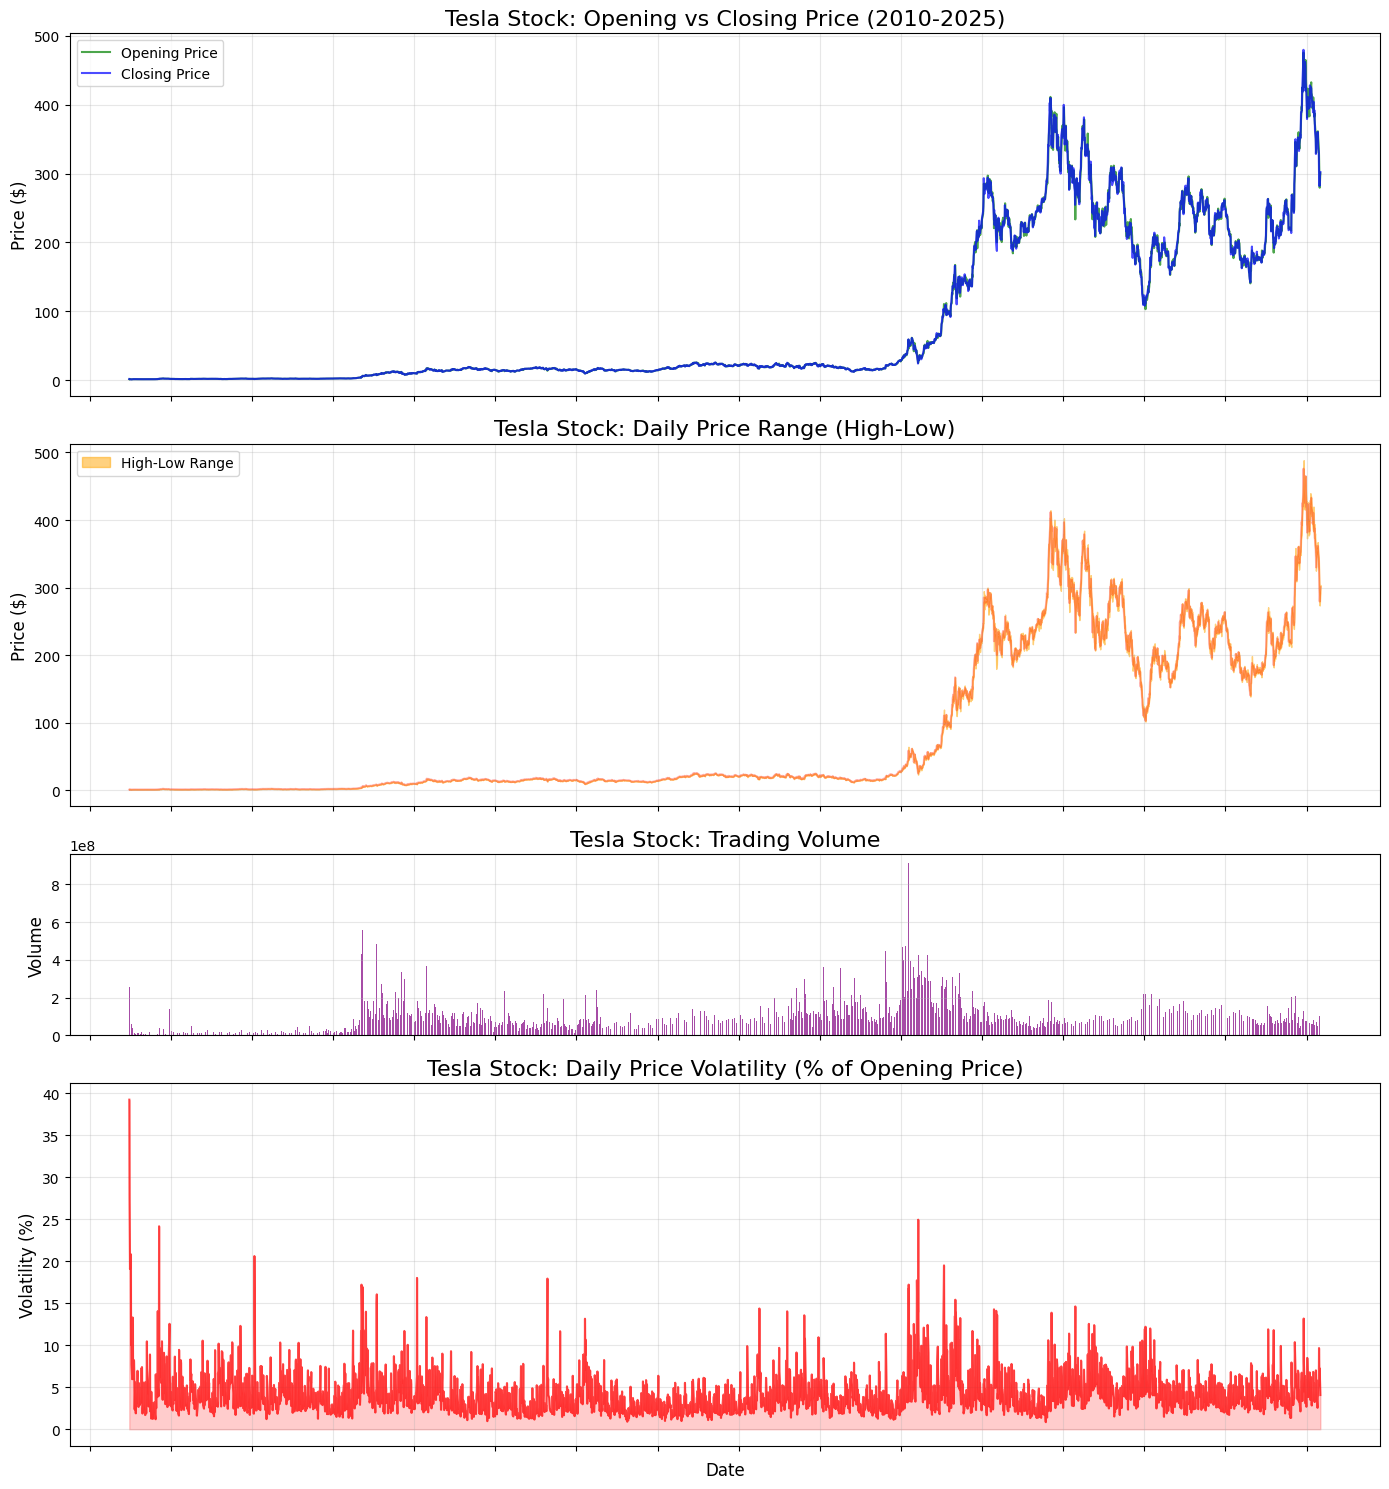

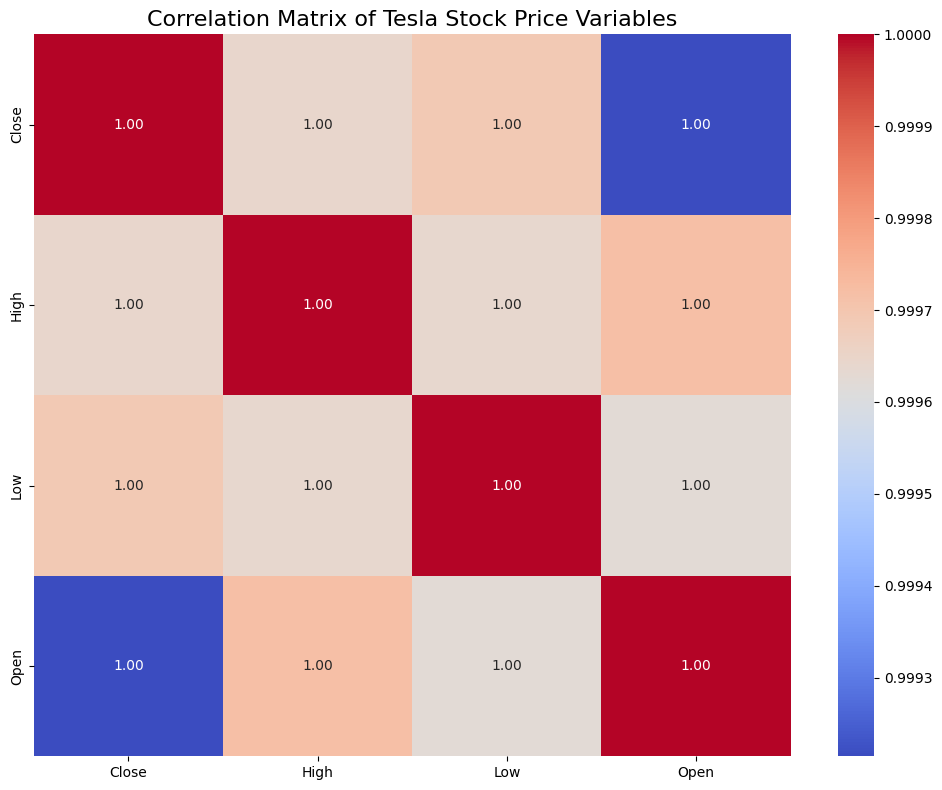

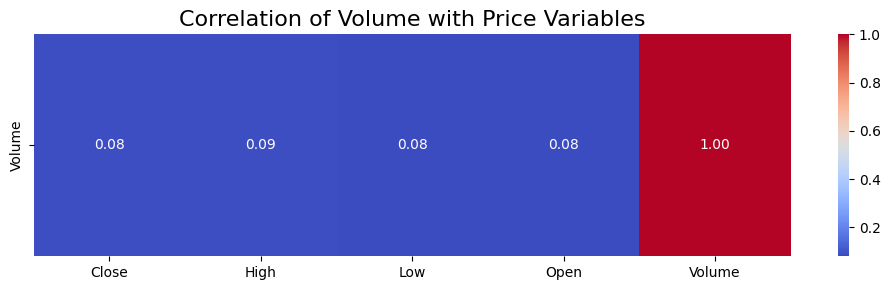


Summary Statistics for Tesla Stock Data:
             Close         High          Low         Open        Volume  \
count  3692.000000  3692.000000  3692.000000  3692.000000  3.692000e+03   
mean     84.684063    86.583019    82.720395    84.724803  9.647972e+07   
std     111.289879   113.897252   108.647448   111.413059  7.736170e+07   
min       1.053333     1.108667     0.998667     1.076000  1.777500e+06   
25%      12.226501    12.447833    12.011500    12.238833  4.938900e+07   
50%      18.326334    18.641334    17.938334    18.325000  8.192955e+07   
75%     182.869999   186.305000   178.772499   182.982506  1.216402e+08   
max     479.859985   488.540009   457.510010   475.899994  9.140820e+08   

       Daily_Volatility  
count       3692.000000  
mean           4.219175  
std            2.448622  
min            0.846113  
25%            2.655793  
50%            3.666841  
75%            5.109934  
max           39.263200  

Creating monthly average analysis...


<ipython-input-4-7b68bc10b505>:119: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = period_data.resample('M').mean()


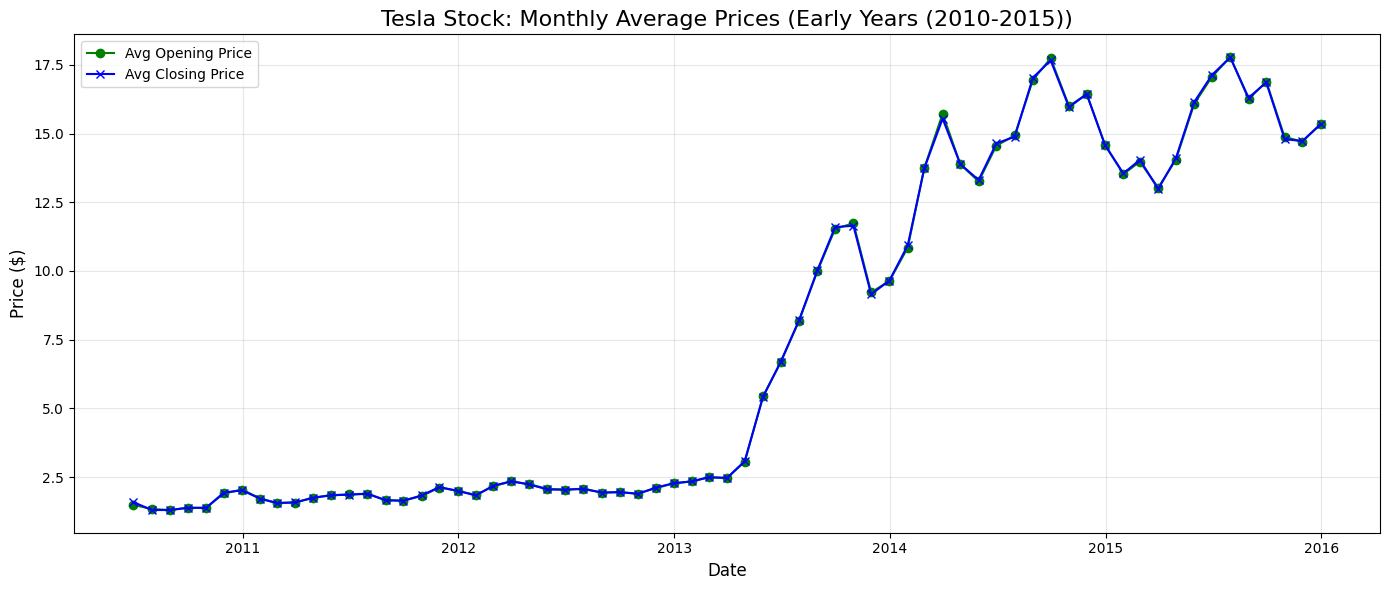

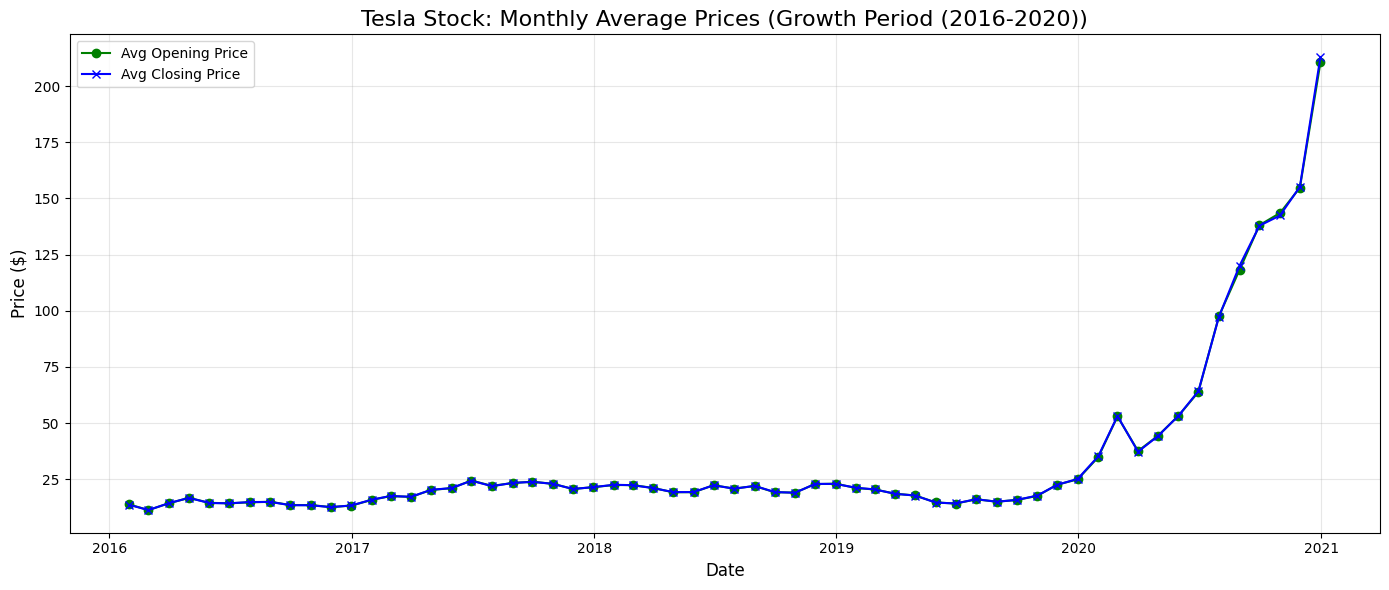

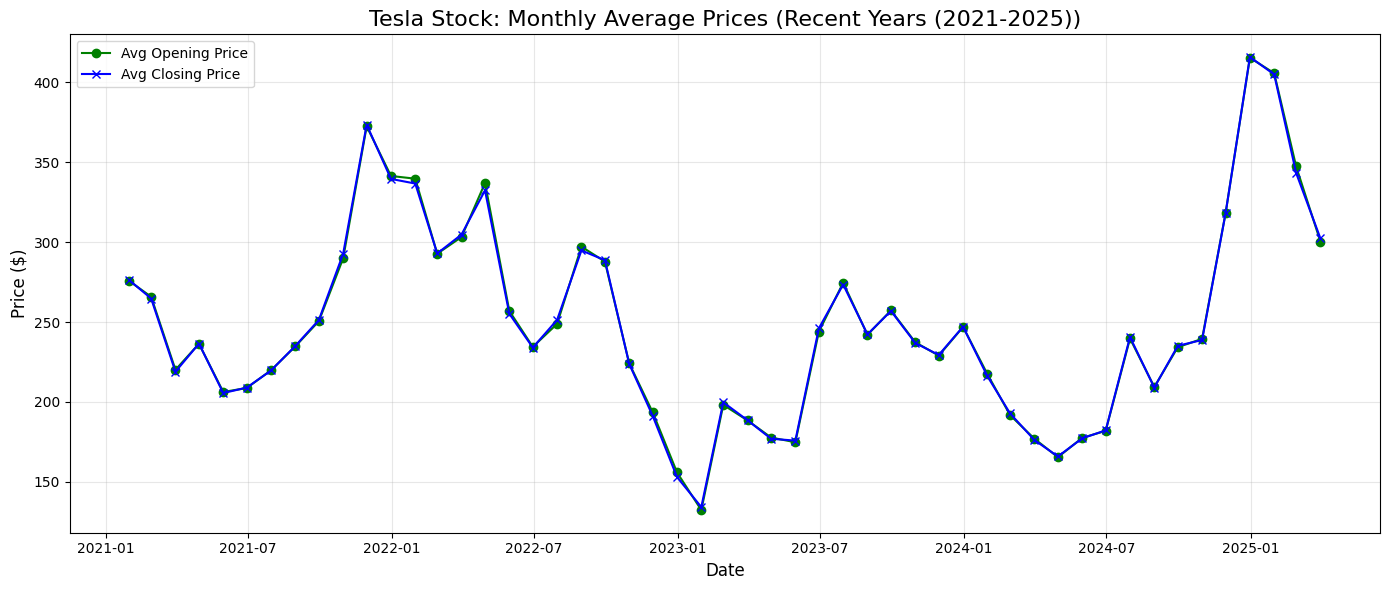

<ipython-input-4-7b68bc10b505>:140: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_performance = df.resample('Y').agg({


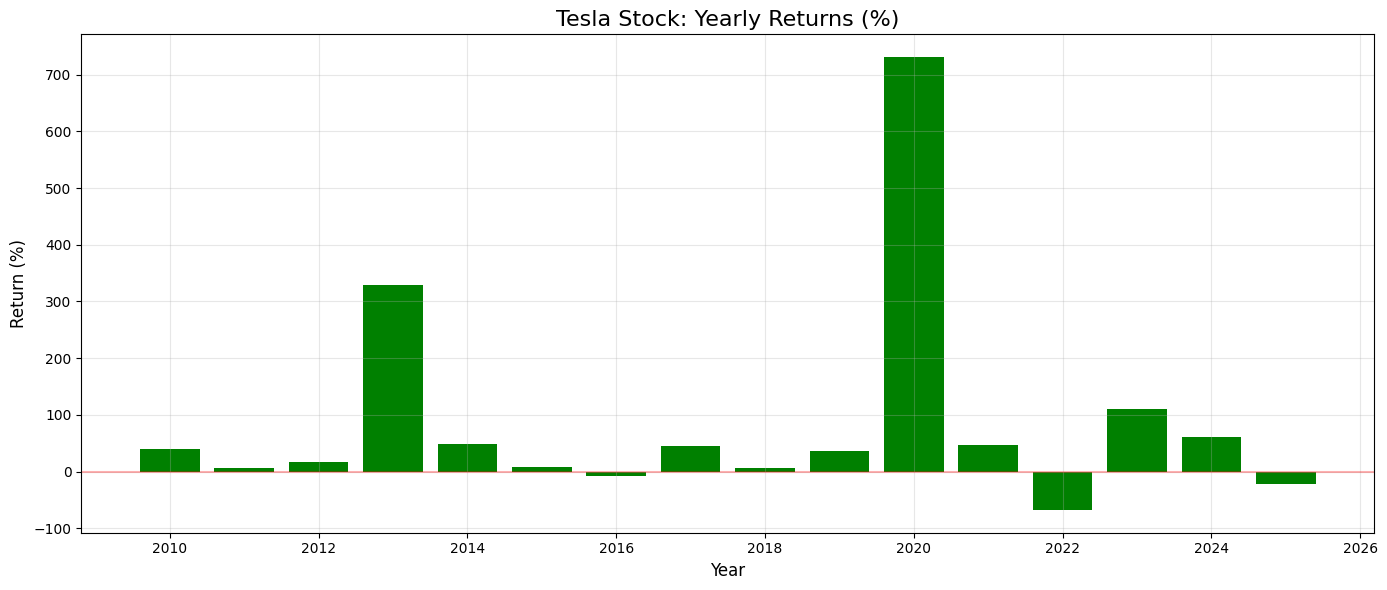


Yearly Performance Summary:
                  Open       Close  Yearly_Return
Date                                             
2010-12-31    1.266667    1.775333      40.157834
2011-12-31    1.789333    1.904000       6.408369
2012-12-31    1.929333    2.258000      17.035262
2013-12-31    2.333333   10.028667     329.800092
2014-12-31    9.986667   14.827333      48.471296
2015-12-31   14.858000   16.000668       7.690589
2016-12-31   15.381333   14.246000      -7.381240
2017-12-31   14.324000   20.756666      44.908305
2018-12-31   20.799999   22.186666       6.666670
2019-12-31   20.406668   27.888666      36.664479
2020-12-31   28.299999  235.223328     731.177859
2021-12-31  239.820007  352.260010      46.885163
2022-12-31  382.583344  123.180000     -67.803094
2023-12-31  118.470001  248.479996     109.740857
2024-12-31  250.080002  403.839996      61.484322
2025-12-31  390.100006  302.339996     -22.496798


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from matplotlib.gridspec import GridSpec
from google.colab import files
import io

# Upload the CSV file
print("Please upload the tesla_stock_data_2000_2025.csv file...")
uploaded = files.upload()

# Get the file name from the uploaded files
file_name = next(iter(uploaded))
print(f"File uploaded: {file_name}")

# Read the CSV file, skipping the first 3 rows which contain non-standard headers
df = pd.read_csv(io.BytesIO(uploaded[file_name]), skiprows=3, header=None)

# Set the appropriate column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Display the first few rows to confirm data structure
print("\nFirst 5 rows of the data:")
print(df.head())

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert numeric columns to float
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort the dataframe by date
df = df.sort_values('Date')

# Set the date as index
df.set_index('Date', inplace=True)

# Create a figure with subplots
plt.figure(figsize=(14, 15))
gs = GridSpec(4, 1, height_ratios=[2, 2, 1, 2])

# Plot for Open and Close prices
ax1 = plt.subplot(gs[0])
ax1.plot(df.index, df['Open'], label='Opening Price', color='green', alpha=0.7)
ax1.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.7)
ax1.set_title('Tesla Stock: Opening vs Closing Price (2010-2025)', fontsize=16)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()
# Format x-axis to show dates appropriately
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.YearLocator())

# Plot for High-Low range
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.fill_between(df.index, df['Low'], df['High'], color='orange', alpha=0.5, label='High-Low Range')
ax2.plot(df.index, df['Open'], color='red', alpha=0.3)  # Reference line
ax2.set_title('Tesla Stock: Daily Price Range (High-Low)', fontsize=16)
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot for Volume
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.bar(df.index, df['Volume'], color='purple', alpha=0.7)
ax3.set_title('Tesla Stock: Trading Volume', fontsize=16)
ax3.set_ylabel('Volume', fontsize=12)
ax3.grid(True, alpha=0.3)

# Calculate daily price volatility
df['Daily_Volatility'] = ((df['High'] - df['Low']) / df['Open']) * 100

# Plot for Volatility
ax4 = plt.subplot(gs[3], sharex=ax1)
ax4.plot(df.index, df['Daily_Volatility'], color='red', alpha=0.7)
ax4.fill_between(df.index, 0, df['Daily_Volatility'], color='red', alpha=0.2)
ax4.set_title('Tesla Stock: Daily Price Volatility (% of Opening Price)', fontsize=16)
ax4.set_ylabel('Volatility (%)', fontsize=12)
ax4.set_xlabel('Date', fontsize=12)
ax4.grid(True, alpha=0.3)

# Format the x-axis to show dates clearly
plt.setp([ax1, ax2, ax3], xticklabels=[])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Add a correlation heatmap in a separate figure
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols[:-1]].corr()  # Exclude Volume for better scale
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Tesla Stock Price Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Show volume correlation separately
plt.figure(figsize=(10, 3))
volume_corr = pd.DataFrame(df[numeric_cols].corr()['Volume']).transpose()
sns.heatmap(volume_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Volume with Price Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Show summary statistics
print("\nSummary Statistics for Tesla Stock Data:")
print(df.describe())

# Calculate and show monthly average prices for different time periods
print("\nCreating monthly average analysis...")

# Function to plot monthly averages for a specific time period
def plot_monthly_avg(start_year, end_year, title):
    period_data = df[(df.index >= f'{start_year}-01-01') & (df.index <= f'{end_year}-12-31')]
    if len(period_data) > 0:
        monthly_avg = period_data.resample('M').mean()

        plt.figure(figsize=(14, 6))
        plt.plot(monthly_avg.index, monthly_avg['Open'], label='Avg Opening Price', color='green', marker='o')
        plt.plot(monthly_avg.index, monthly_avg['Close'], label='Avg Closing Price', color='blue', marker='x')
        plt.title(f'Tesla Stock: Monthly Average Prices ({title})', fontsize=16)
        plt.ylabel('Price ($)', fontsize=12)
        plt.xlabel('Date', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for period {start_year}-{end_year}")

# Plot for different time periods
plot_monthly_avg(2010, 2015, 'Early Years (2010-2015)')
plot_monthly_avg(2016, 2020, 'Growth Period (2016-2020)')
plot_monthly_avg(2021, 2025, 'Recent Years (2021-2025)')

# Additional analysis: Yearly performance
yearly_performance = df.resample('Y').agg({
    'Open': 'first',
    'Close': 'last',
    'High': 'max',
    'Low': 'min',
    'Volume': 'mean'
})
yearly_performance['Yearly_Return'] = (yearly_performance['Close'] - yearly_performance['Open']) / yearly_performance['Open'] * 100

plt.figure(figsize=(14, 6))
plt.bar(yearly_performance.index.year, yearly_performance['Yearly_Return'], color='green')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Tesla Stock: Yearly Returns (%)', fontsize=16)
plt.ylabel('Return (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nYearly Performance Summary:")
print(yearly_performance[['Open', 'Close', 'Yearly_Return']])

Please upload the tesla_stock_data_2000_2025.csv file...


Saving tesla_stock_data_2000_2025.csv to tesla_stock_data_2000_2025 (2).csv
File uploaded: tesla_stock_data_2000_2025 (2).csv

First 5 rows of the data:
         Date     Close      High       Low      Open     Volume
0  2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1  2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2  2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3  2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4  2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


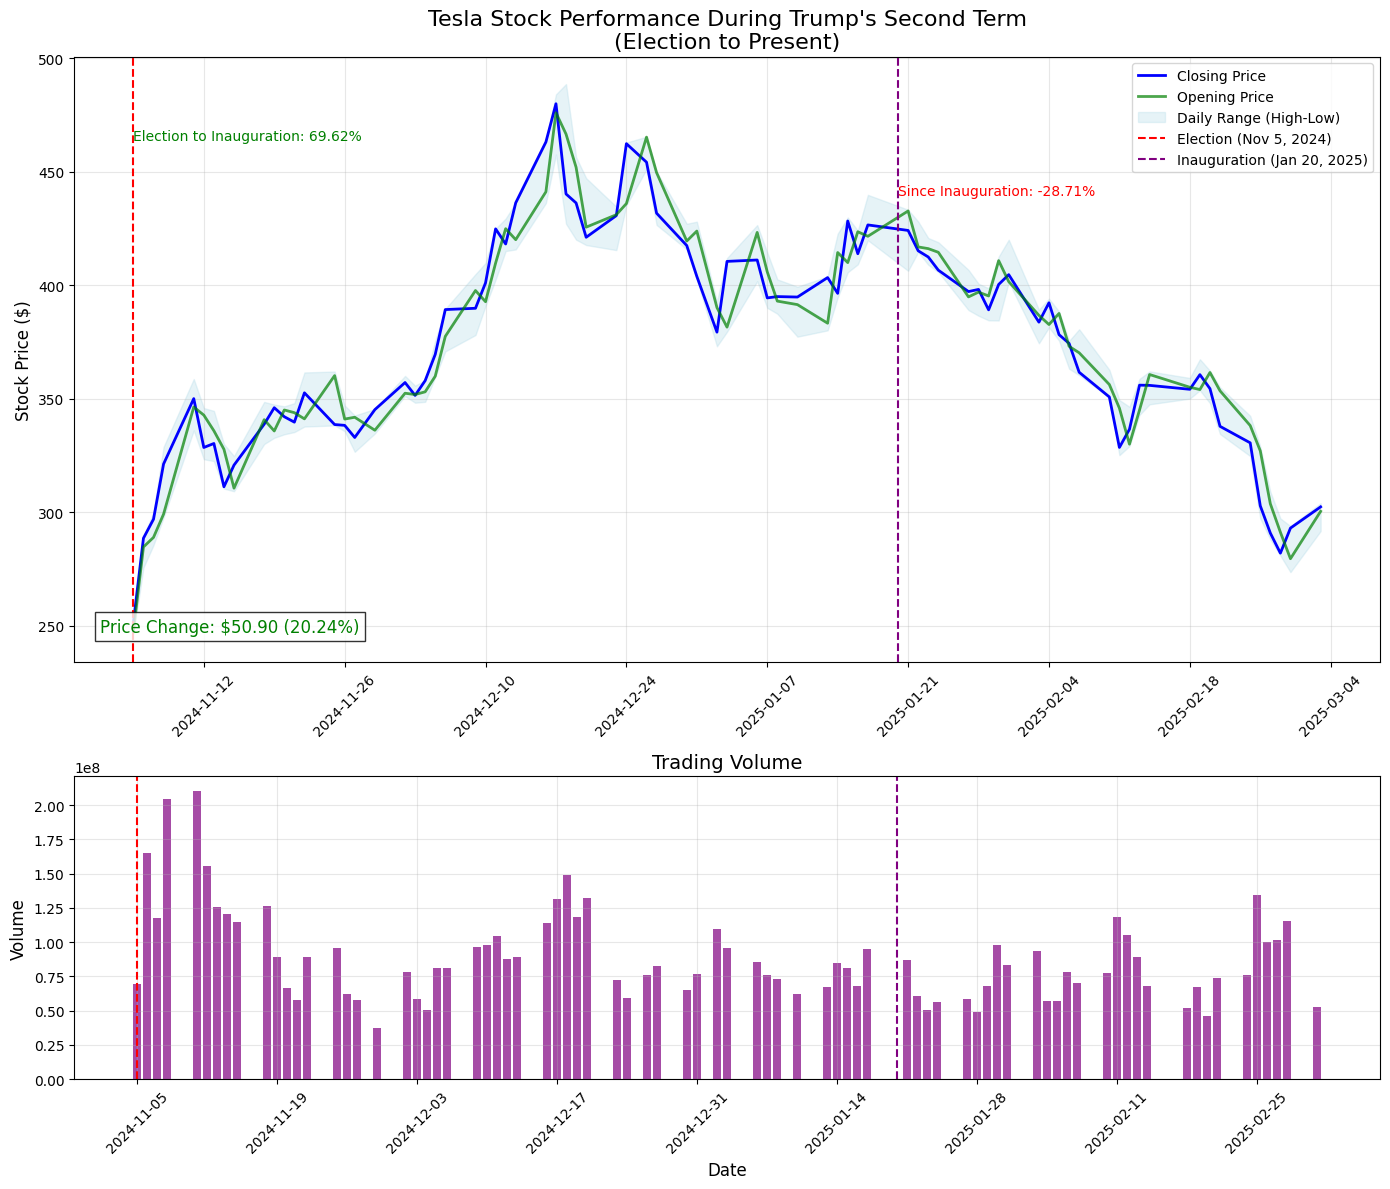


Tesla Stock Performance During Trump's Second Term (Election to Present):
Start Date: 2024-11-05
End Date: 2025-03-27
Starting Price: $251.44
Current Price: $302.34
Total Change: $50.90 (20.24%)
Highest Price: $488.54
Lowest Price: $246.21
Average Daily Volume: 88787344

Pre vs Post Inauguration Performance:
Election to Inauguration: 69.62%
Since Inauguration: -28.71%

Average Daily Volatility: 5.12%


<ipython-input-5-ea494489146e>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_second_term_data['Daily_Volatility'] = ((trump_second_term_data['High'] - trump_second_term_data['Low'])


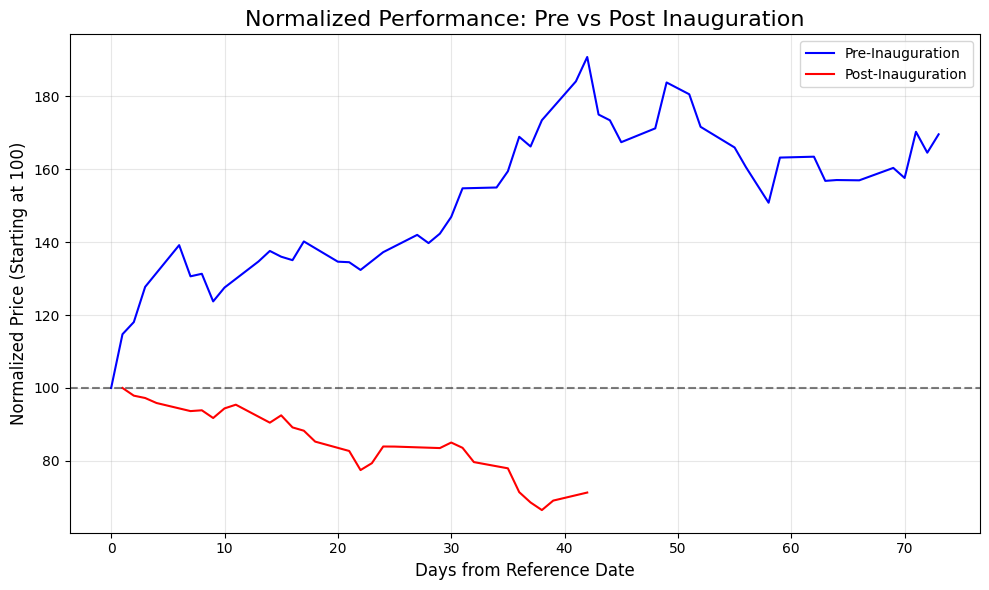

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
from google.colab import files
import io

# Upload the CSV file
print("Please upload the tesla_stock_data_2000_2025.csv file...")
uploaded = files.upload()

# Get the file name from the uploaded files
file_name = next(iter(uploaded))
print(f"File uploaded: {file_name}")

# Read the CSV file, skipping the first 3 rows which contain non-standard headers
df = pd.read_csv(io.BytesIO(uploaded[file_name]), skiprows=3, header=None)

# Set the appropriate column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Display the first few rows to confirm data structure
print("\nFirst 5 rows of the data:")
print(df.head())

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert numeric columns to float
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort the dataframe by date
df = df.sort_values('Date')

# Define key dates for Trump's second term
election_date = pd.to_datetime('2024-11-05')
inauguration_date = pd.to_datetime('2025-01-20')
current_date = pd.to_datetime('2025-03-27')

# Filter data for the relevant period (from election to current date)
trump_second_term_data = df[(df['Date'] >= election_date) & (df['Date'] <= current_date)]

# If there's data in this range, continue with the visualization
if len(trump_second_term_data) > 0:
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), gridspec_kw={'height_ratios': [2, 1]})

    # Plot stock prices during this period
    ax1.plot(trump_second_term_data['Date'], trump_second_term_data['Close'], label='Closing Price', color='blue', linewidth=2)
    ax1.plot(trump_second_term_data['Date'], trump_second_term_data['Open'], label='Opening Price', color='green', linewidth=2, alpha=0.7)
    ax1.fill_between(trump_second_term_data['Date'], trump_second_term_data['Low'], trump_second_term_data['High'],
                    color='lightblue', alpha=0.3, label='Daily Range (High-Low)')

    # Add vertical lines for key dates
    ax1.axvline(x=election_date, color='red', linestyle='--', label='Election (Nov 5, 2024)')
    ax1.axvline(x=inauguration_date, color='purple', linestyle='--', label='Inauguration (Jan 20, 2025)')

    # Format the plot
    ax1.set_title('Tesla Stock Performance During Trump\'s Second Term\n(Election to Present)', fontsize=16)
    ax1.set_ylabel('Stock Price ($)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='best')

    # Format x-axis to show dates clearly
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # Plot trading volume
    ax2.bar(trump_second_term_data['Date'], trump_second_term_data['Volume'], color='purple', alpha=0.7)
    ax2.set_title('Trading Volume', fontsize=14)
    ax2.set_ylabel('Volume', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.grid(True, alpha=0.3)

    # Add the same vertical lines to the volume plot
    ax2.axvline(x=election_date, color='red', linestyle='--')
    ax2.axvline(x=inauguration_date, color='purple', linestyle='--')

    # Format x-axis to show dates clearly
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    # Calculate statistics for this period
    initial_price = trump_second_term_data['Close'].iloc[0]
    latest_price = trump_second_term_data['Close'].iloc[-1]
    price_change = latest_price - initial_price
    percent_change = (price_change / initial_price * 100)

    # Add text annotations with key statistics
    change_color = 'green' if percent_change > 0 else 'red'
    stats_text = f'Price Change: ${price_change:.2f} ({percent_change:.2f}%)'
    ax1.text(0.02, 0.05, stats_text, transform=ax1.transAxes, fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8), color=change_color)

    # Add annotation for pre- and post-inauguration performance
    pre_inauguration = trump_second_term_data[trump_second_term_data['Date'] < inauguration_date]
    post_inauguration = trump_second_term_data[trump_second_term_data['Date'] >= inauguration_date]

    if len(pre_inauguration) > 0 and len(post_inauguration) > 0:
        pre_change = (pre_inauguration['Close'].iloc[-1] - pre_inauguration['Close'].iloc[0]) / pre_inauguration['Close'].iloc[0] * 100
        post_change = (post_inauguration['Close'].iloc[-1] - post_inauguration['Close'].iloc[0]) / post_inauguration['Close'].iloc[0] * 100

        pre_color = 'green' if pre_change > 0 else 'red'
        post_color = 'green' if post_change > 0 else 'red'

        ax1.text(election_date, trump_second_term_data['High'].max() * 0.95,
                f'Election to Inauguration: {pre_change:.2f}%', color=pre_color, fontsize=10)
        ax1.text(inauguration_date, trump_second_term_data['High'].max() * 0.9,
                f'Since Inauguration: {post_change:.2f}%', color=post_color, fontsize=10)

    plt.tight_layout()
    plt.show()

    # Calculate additional stats for this period
    print("\nTesla Stock Performance During Trump's Second Term (Election to Present):")
    print(f"Start Date: {election_date.strftime('%Y-%m-%d')}")
    print(f"End Date: {current_date.strftime('%Y-%m-%d')}")
    print(f"Starting Price: ${trump_second_term_data['Close'].iloc[0]:.2f}")
    print(f"Current Price: ${trump_second_term_data['Close'].iloc[-1]:.2f}")
    print(f"Total Change: ${price_change:.2f} ({percent_change:.2f}%)")
    print(f"Highest Price: ${trump_second_term_data['High'].max():.2f}")
    print(f"Lowest Price: ${trump_second_term_data['Low'].min():.2f}")
    print(f"Average Daily Volume: {trump_second_term_data['Volume'].mean():.0f}")

    # Calculate pre and post inauguration stats
    print("\nPre vs Post Inauguration Performance:")
    if len(pre_inauguration) > 0:
        print(f"Election to Inauguration: {pre_change:.2f}%")
    if len(post_inauguration) > 0:
        print(f"Since Inauguration: {post_change:.2f}%")

    # Calculate volatility during this period
    trump_second_term_data['Daily_Volatility'] = ((trump_second_term_data['High'] - trump_second_term_data['Low'])
                                                / trump_second_term_data['Open']) * 100
    print(f"\nAverage Daily Volatility: {trump_second_term_data['Daily_Volatility'].mean():.2f}%")

    # Create a separate figure for pre vs post inauguration comparison
    plt.figure(figsize=(10, 6))

    # Normalize prices to 100 at the start of each period for comparison
    if len(pre_inauguration) > 0:
        pre_normalized = pre_inauguration['Close'] / pre_inauguration['Close'].iloc[0] * 100
        pre_dates = (pre_inauguration['Date'] - election_date).dt.days
        plt.plot(pre_dates, pre_normalized, label='Pre-Inauguration', color='blue')

    if len(post_inauguration) > 0:
        post_normalized = post_inauguration['Close'] / post_inauguration['Close'].iloc[0] * 100
        post_dates = (post_inauguration['Date'] - inauguration_date).dt.days
        plt.plot(post_dates, post_normalized, label='Post-Inauguration', color='red')

    plt.axhline(y=100, color='black', linestyle='--', alpha=0.5)
    plt.title('Normalized Performance: Pre vs Post Inauguration', fontsize=16)
    plt.xlabel('Days from Reference Date', fontsize=12)
    plt.ylabel('Normalized Price (Starting at 100)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print(f"\nNo data available for the period between {election_date.strftime('%Y-%m-%d')} and {current_date.strftime('%Y-%m-%d')}")
    print("The dataset might not cover this recent time period. Here's the date range in the dataset:")
    print(f"Dataset date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")

    # If no data for Trump's second term, show the most recent data instead
    recent_months = 6
    latest_date = df['Date'].max()
    six_months_ago = latest_date - pd.DateOffset(months=recent_months)
    recent_data = df[df['Date'] >= six_months_ago]

    if len(recent_data) > 0:
        plt.figure(figsize=(14, 8))
        plt.plot(recent_data['Date'], recent_data['Close'], label='Closing Price', color='blue')
        plt.title(f'Tesla Stock: Most Recent {recent_months} Months of Available Data', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Price ($)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

        print(f"\nShowing most recent {recent_months} months instead ({six_months_ago.strftime('%Y-%m-%d')} to {latest_date.strftime('%Y-%m-%d')})")

Please upload the tesla_stock_data_2000_2025.csv file...


Saving tesla_stock_data_2000_2025.csv to tesla_stock_data_2000_2025 (3).csv
File uploaded: tesla_stock_data_2000_2025 (3).csv

Current Market Metrics:
Latest Closing Price: $302.34
Annual Volatility: 57.24%
Average Daily Volume: 106813033
20-Day Price Momentum: 81.26%


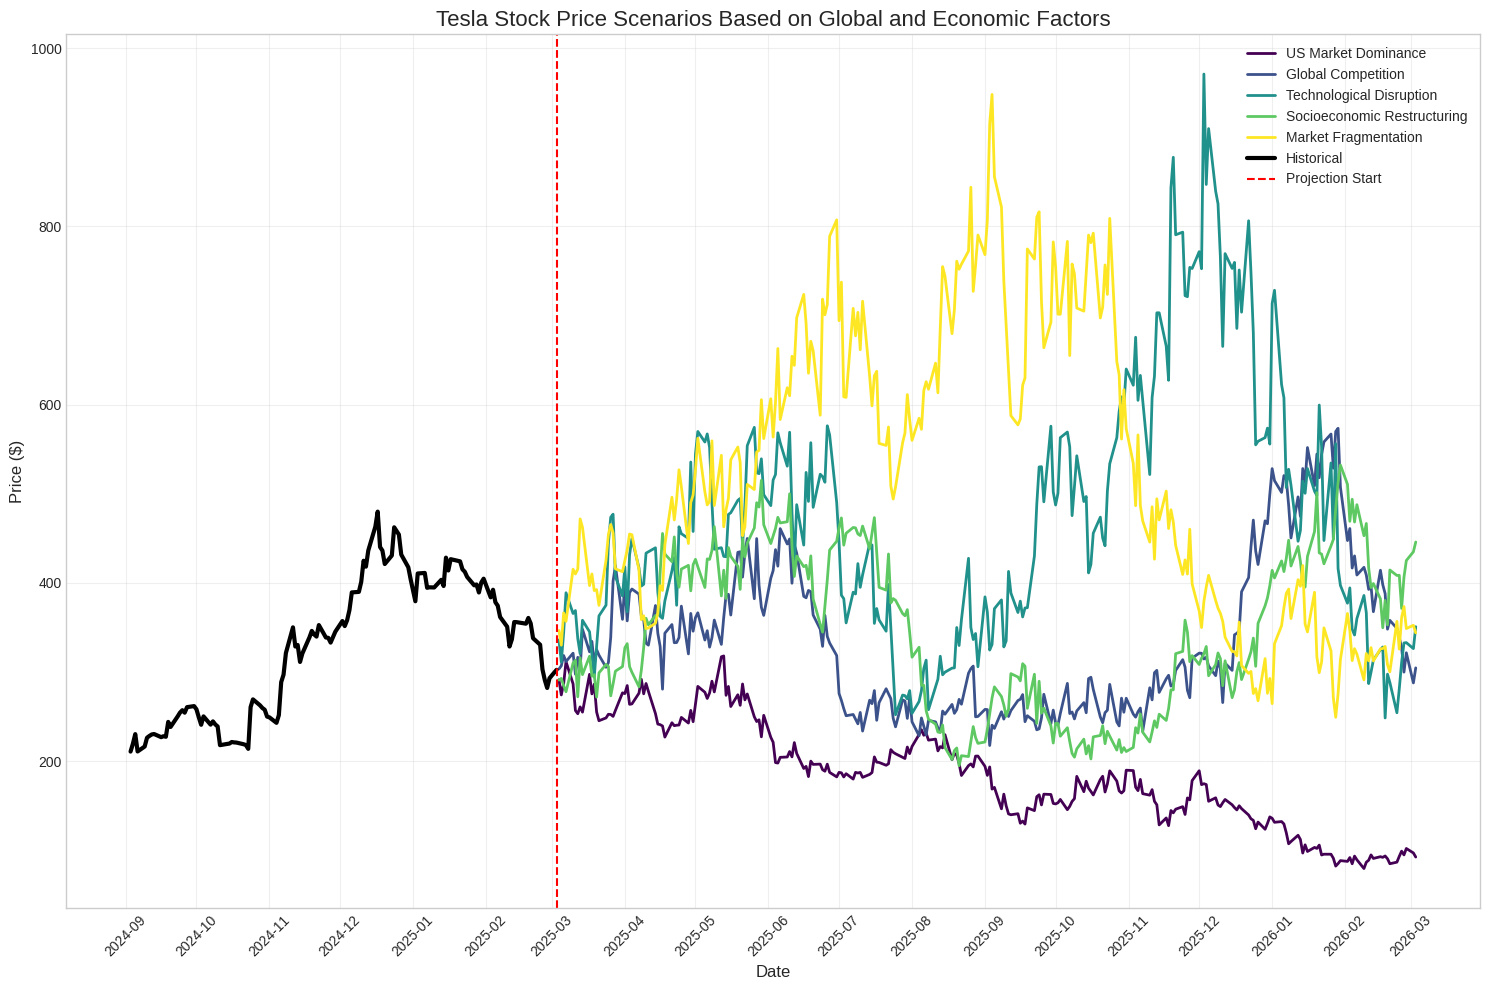

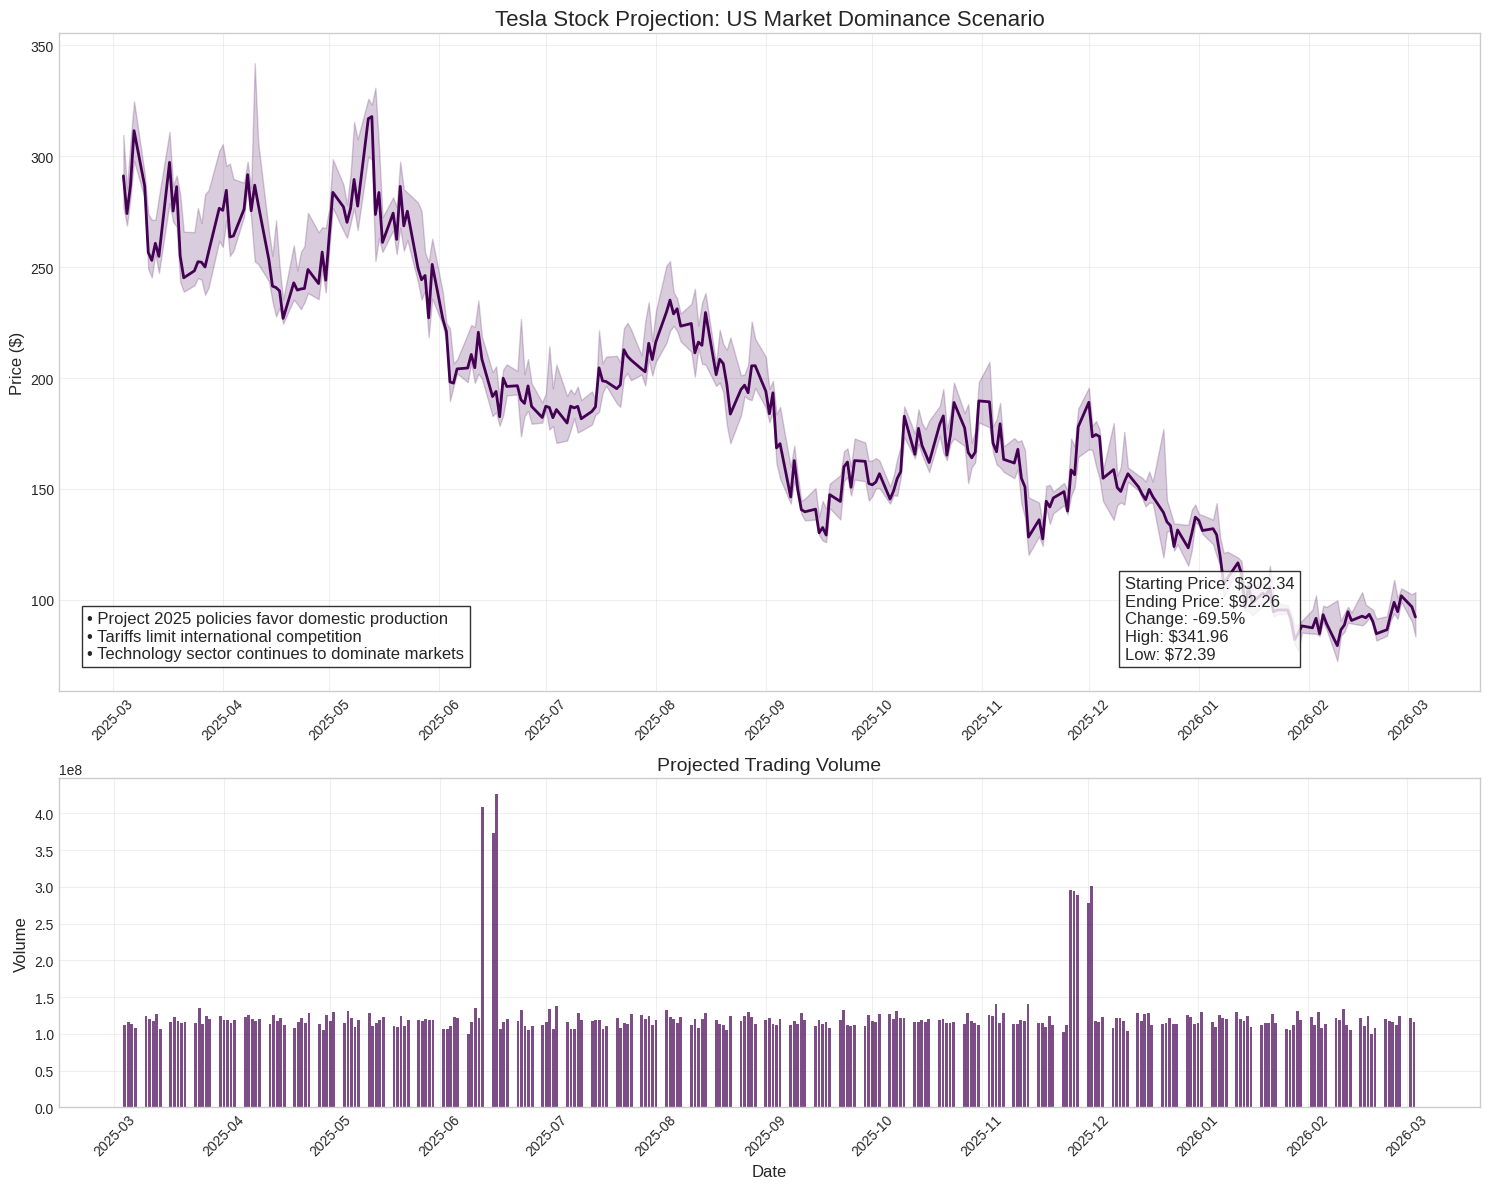

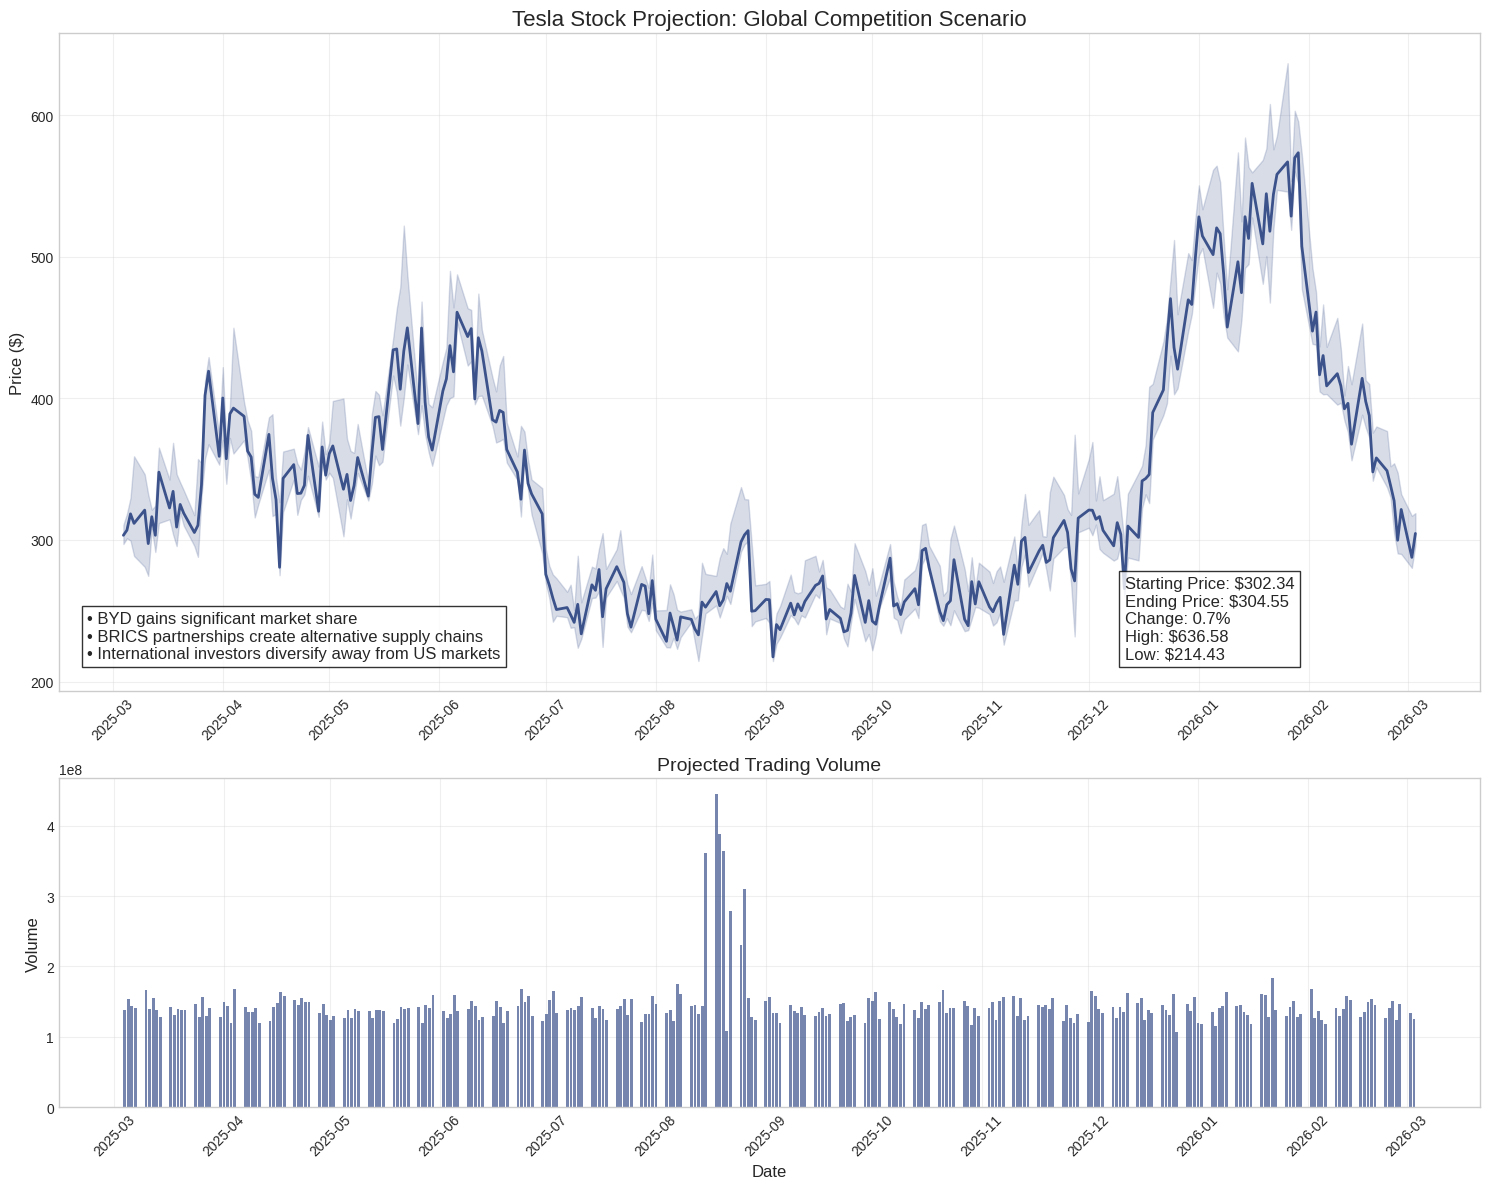

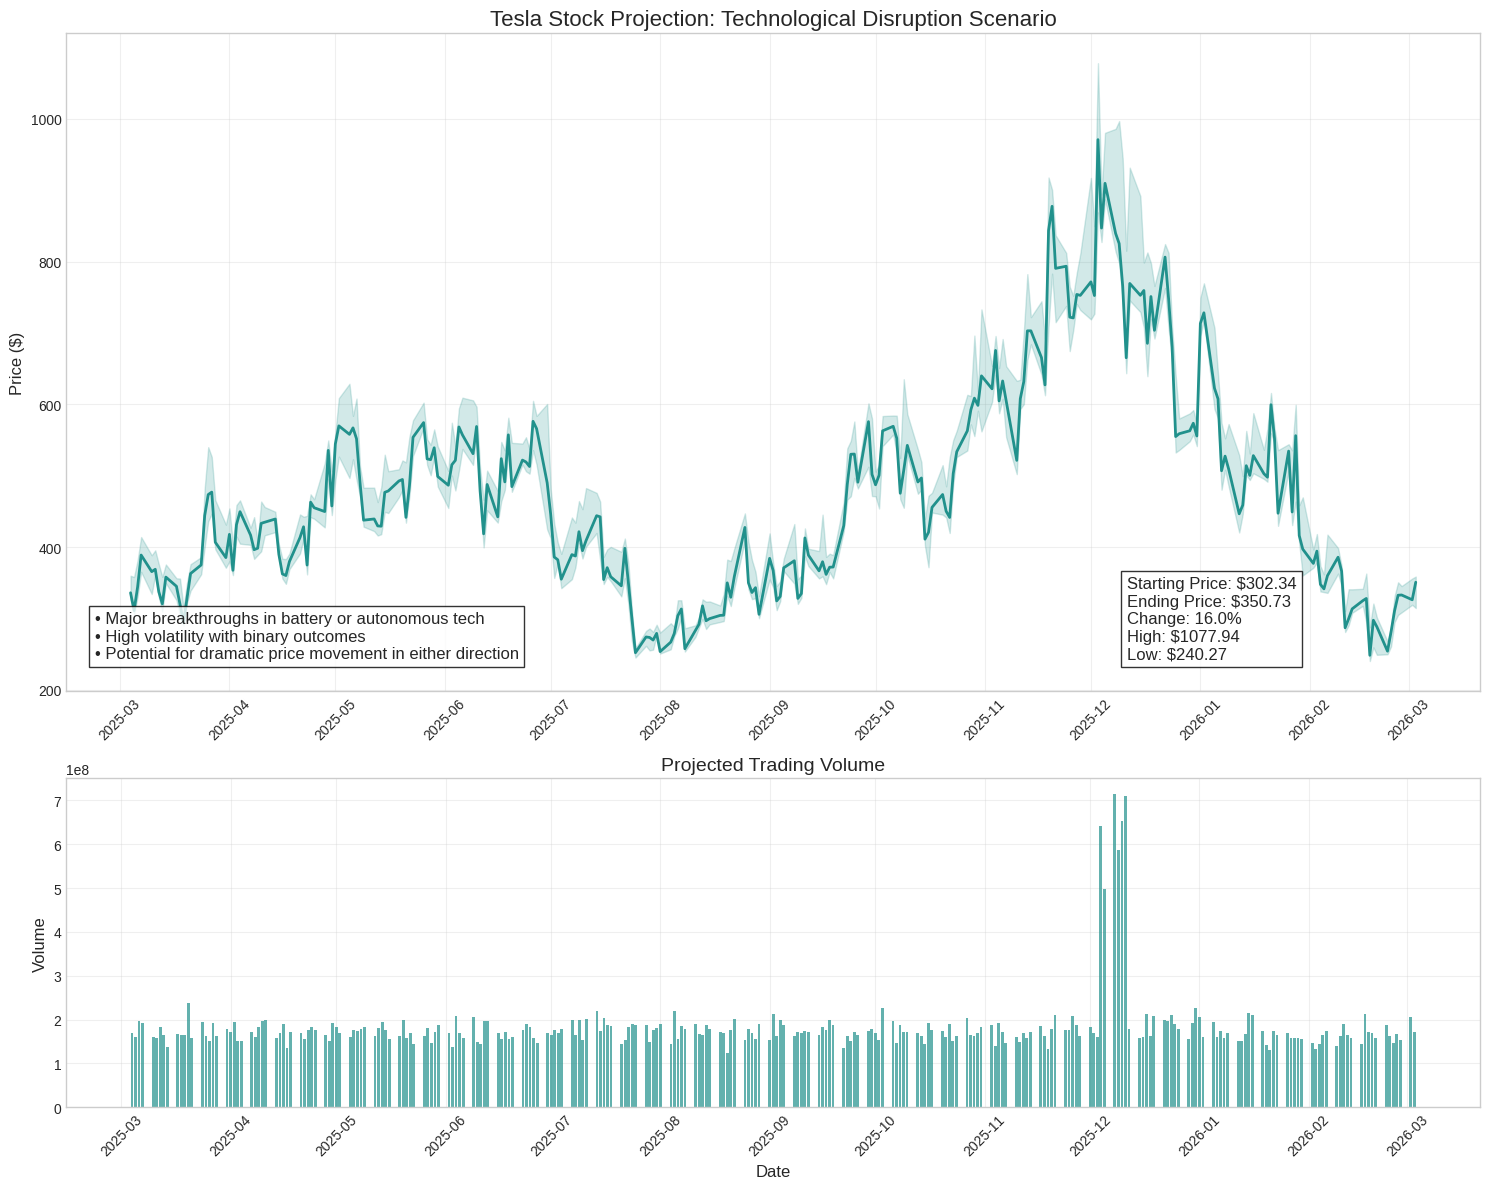

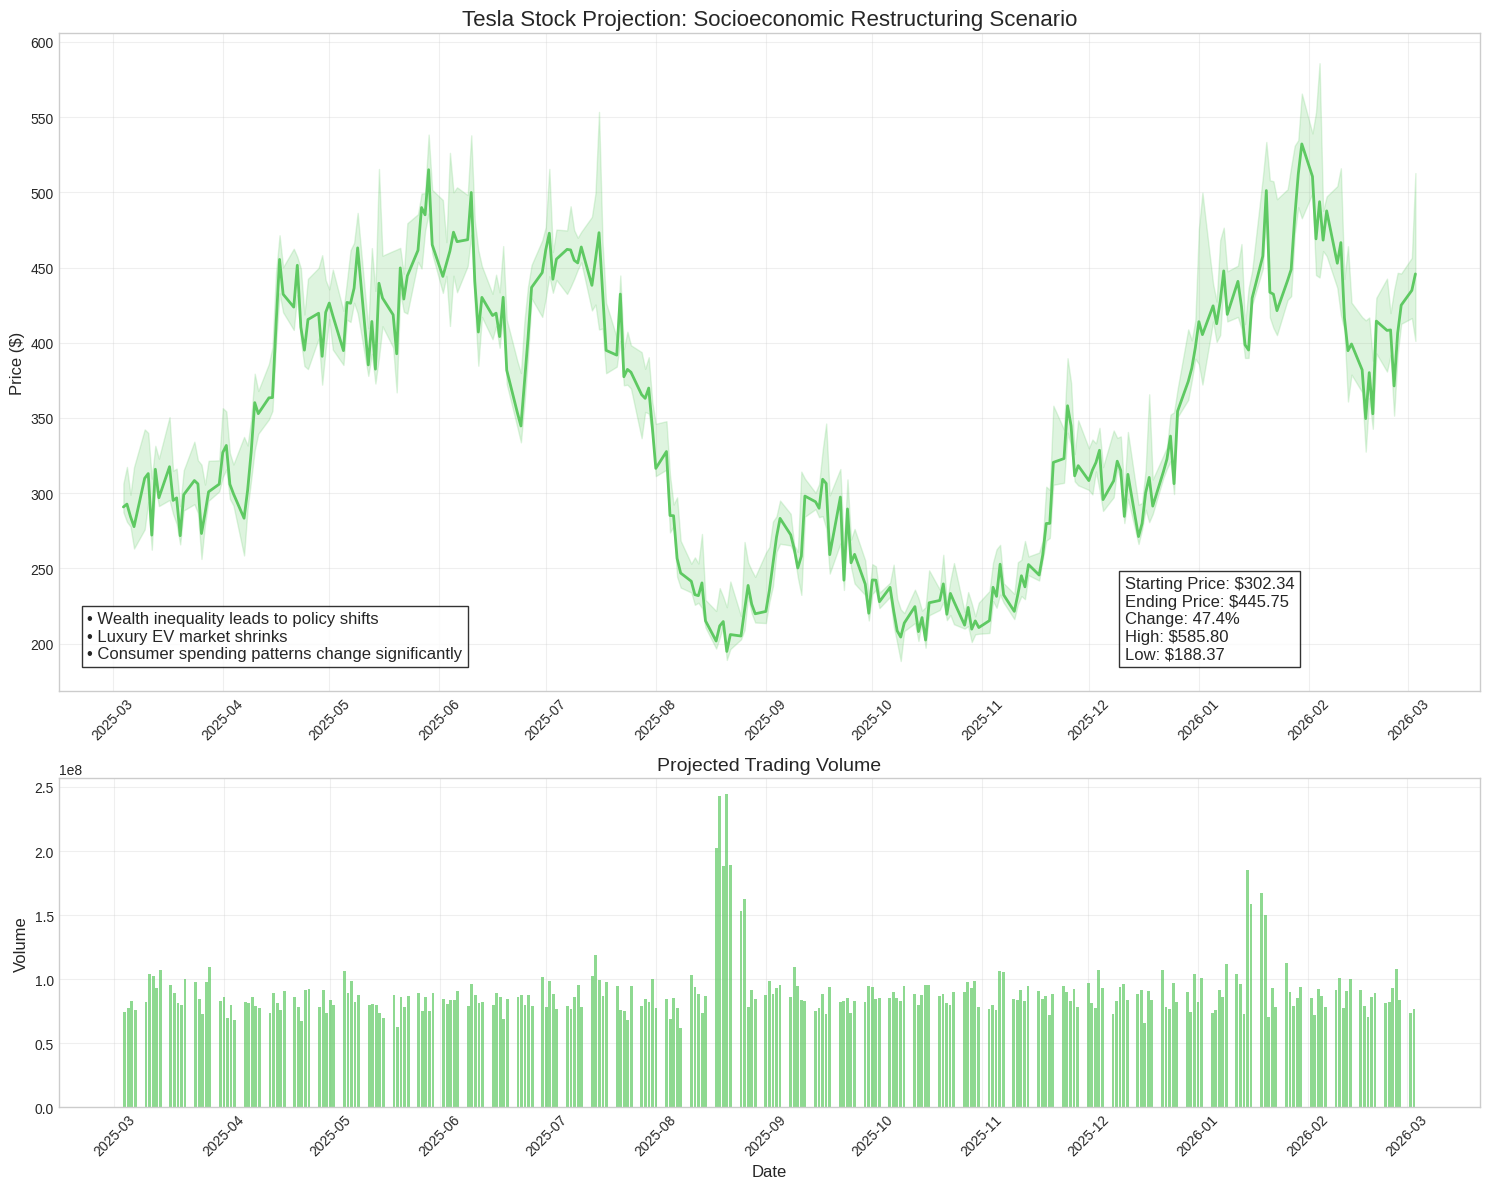

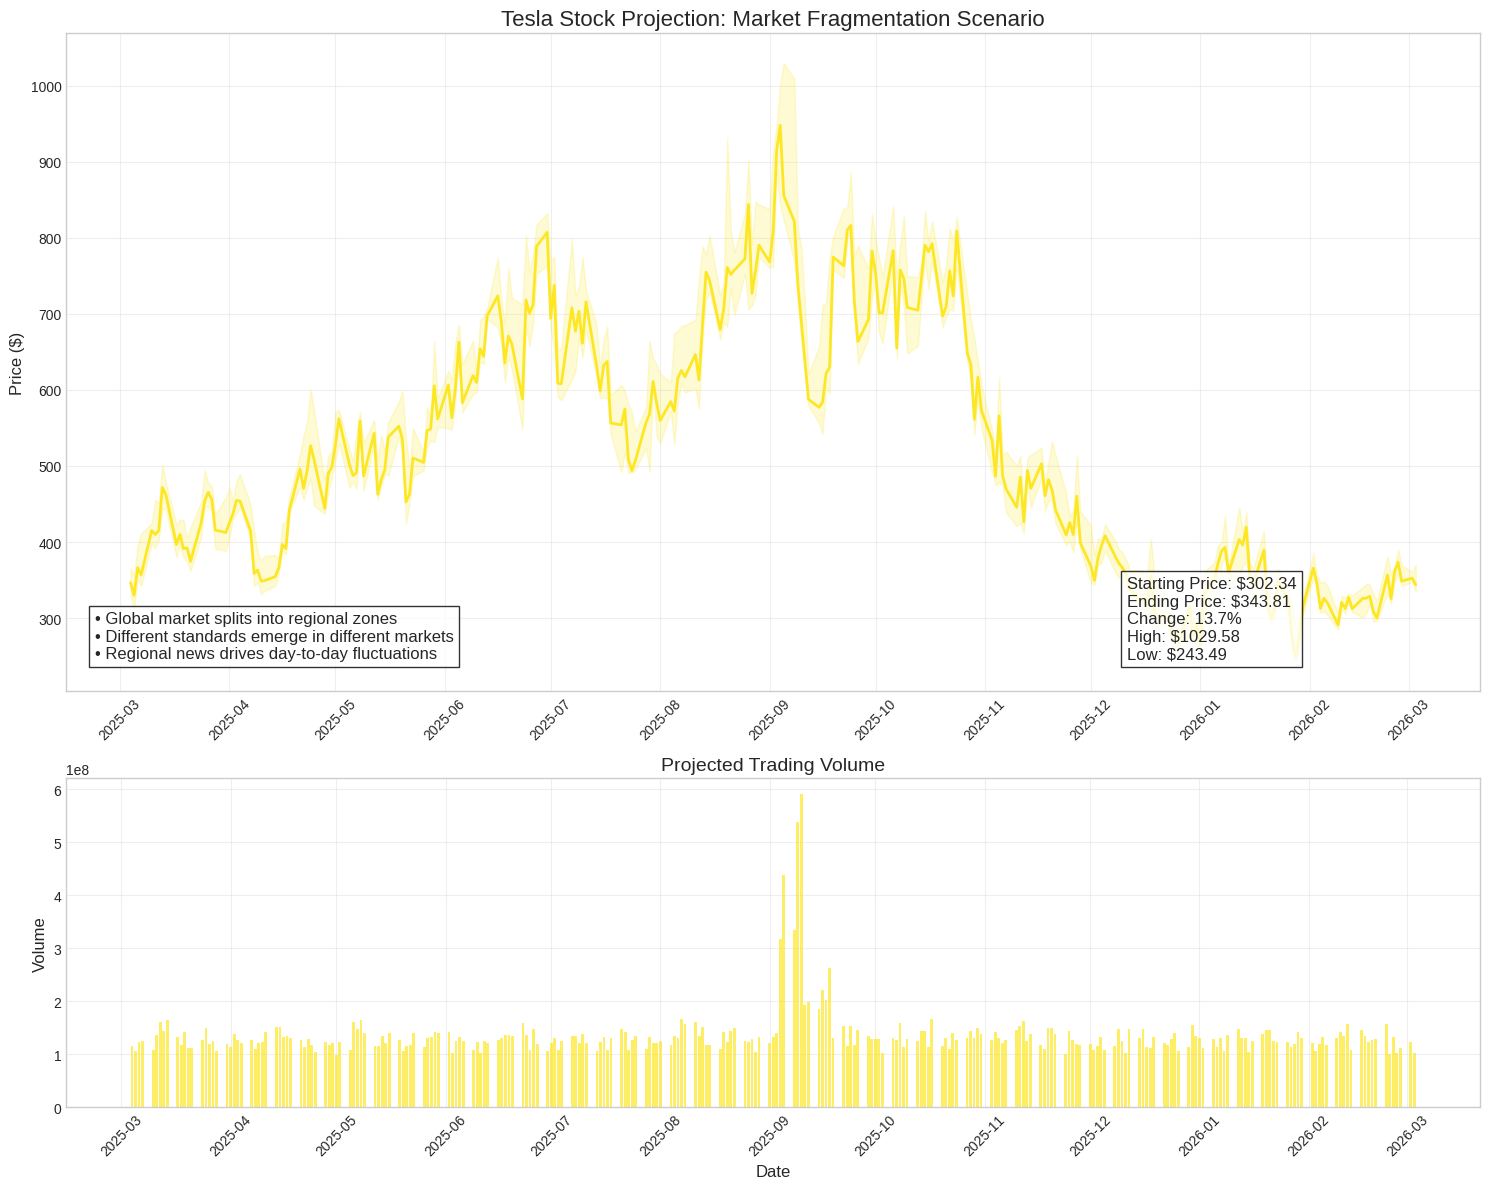


Scenario Comparison:
                             Final Price  Annualized Volatility  \
Scenario                                                          
US Market Dominance            92.256781              95.570082   
Global Competition            304.545537             119.224502   
Technological Disruption      350.727095             161.655303   
Socioeconomic Restructuring   445.750538             108.805662   
Market Fragmentation          343.814875             133.304605   

                             Max Drawdown (%)  Return (%)  
Scenario                                                   
US Market Dominance                -75.042124  -69.485750  
Global Competition                 -52.817720    0.729490  
Technological Disruption           -74.422707   16.004200  
Socioeconomic Restructuring        -62.182164   47.433533  
Market Fragmentation               -73.723415   13.717960  


<Figure size 1200x800 with 0 Axes>

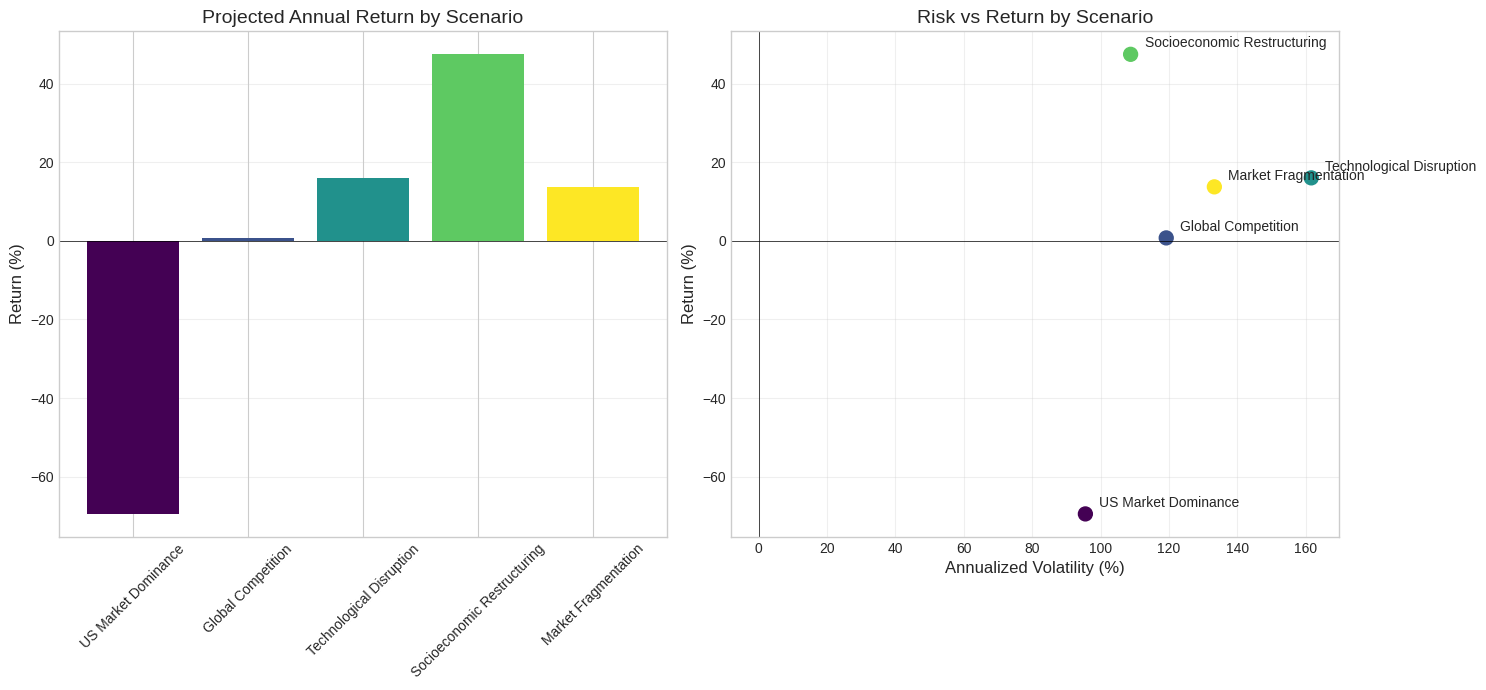


Model Explanation:
This predictive model was created through prompt engineering, incorporating analysis of 
global and domestic factors that could influence Tesla's stock performance.

The model considers five distinct scenarios based on the following factors:
1. Rise of BYD and competitive EV landscape
2. BRICS relations and alternative financial systems
3. US tariff policies and trade tensions
4. Anti-immigration sentiment and policies
5. Investor diversification away from US markets
6. Project 2025 policies and implementation
7. US oligarchy concerns
8. Wealth and income inequality

Each scenario applies different assumptions about how these factors might
influence price trajectories, volatility, and trading volumes.

Note: This is a simulation model based on potential scenarios, not a financial
prediction or investment advice. Real market behavior can differ substantially.


In [ ]:
# Tesla Stock Future Scenario Modeling
# Created through prompt engineering with Claude 3.7 Sonnet
# This model incorporates geopolitical and economic factors including:
# - BYD competition and EV market shifts
# - BRICS relations and alternative financial systems
# - US tariff policies and trade tensions
# - Anti-immigration policies in the US
# - Investor diversification away from US markets
# - Project 2025 policies
# - US oligarchy concerns
# - Wealth and income inequality

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns
from google.colab import files
import io
import random
from scipy.stats import norm

# Upload the CSV file
print("Please upload the tesla_stock_data_2000_2025.csv file...")
uploaded = files.upload()

# Get the file name from the uploaded files
file_name = next(iter(uploaded))
print(f"File uploaded: {file_name}")

# Read the CSV file, skipping the first 3 rows which contain non-standard headers
df = pd.read_csv(io.BytesIO(uploaded[file_name]), skiprows=3, header=None)

# Set the appropriate column names
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert numeric columns to float
numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort the dataframe by date
df = df.sort_values('Date')

# Get the most recent data for analysis (last 2 years)
recent_date = df['Date'].max()
two_years_ago = recent_date - pd.DateOffset(years=2)
recent_data = df[df['Date'] >= two_years_ago]

# Calculate important statistical metrics from recent data
recent_volatility = recent_data['Close'].pct_change().std() * np.sqrt(252)  # Annualized volatility
avg_volume = recent_data['Volume'].mean()
volume_std = recent_data['Volume'].std()
price_momentum = recent_data['Close'].pct_change(periods=20).mean() * 20  # 20-day momentum
latest_price = recent_data['Close'].iloc[-1]

print("\nCurrent Market Metrics:")
print(f"Latest Closing Price: ${latest_price:.2f}")
print(f"Annual Volatility: {recent_volatility*100:.2f}%")
print(f"Average Daily Volume: {avg_volume:.0f}")
print(f"20-Day Price Momentum: {price_momentum*100:.2f}%")

# Define simulation parameters
prediction_days = 365  # One year forecast
num_scenarios = 5
trading_days_per_year = 252
forecast_volatility_multipliers = {
    "US Market Dominance": 1.2,
    "Global Competition": 1.5,
    "Technological Disruption": 2.0,
    "Socioeconomic Restructuring": 1.3,
    "Market Fragmentation": 1.8
}

volume_multipliers = {
    "US Market Dominance": [1.1, 0.2],  # [mean_mult, std_mult]
    "Global Competition": [1.3, 0.4],
    "Technological Disruption": [1.6, 0.6],
    "Socioeconomic Restructuring": [0.8, 0.3],
    "Market Fragmentation": [1.2, 0.5]
}

price_drift_scenarios = {
    "US Market Dominance": 0.15,  # Annual return
    "Global Competition": -0.05,
    "Technological Disruption": 0.25,
    "Socioeconomic Restructuring": -0.10,
    "Market Fragmentation": 0.02
}

# Function to simulate stock price paths
def simulate_price_path(initial_price, drift, volatility, days, trading_days=252, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # Daily drift and volatility
    daily_drift = drift / trading_days
    daily_volatility = volatility / np.sqrt(trading_days)

    # Generate random returns
    random_returns = np.random.normal(daily_drift, daily_volatility, days)

    # Accumulate returns
    cumulative_returns = np.exp(np.cumsum(random_returns))

    # Generate price path
    price_path = initial_price * cumulative_returns

    return price_path

# Function to simulate volume
def simulate_volume(avg_volume, std_volume, multiplier, std_multiplier, days, seed=None):
    if seed is not None:
        np.random.seed(seed + 1000)  # Different seed than price

    # Generate random volumes, with lognormal distribution to ensure positivity
    log_mean = np.log(avg_volume * multiplier)
    log_std = np.log(1 + (std_volume * std_multiplier) / (avg_volume * multiplier))

    volumes = np.random.lognormal(log_mean, log_std, days)

    return volumes

# Function to add specific events
def add_events(price_series, volume_series, scenario):
    # Copy the series to avoid modifying the original
    prices = price_series.copy()
    volumes = volume_series.copy()

    # Randomly select days for events
    event_days = np.random.choice(range(30, len(prices)-30), size=3, replace=False)

    if scenario == "US Market Dominance":
        # Tariff announcement
        prices[event_days[0]:event_days[0]+5] *= np.linspace(1.02, 1.05, 5)
        volumes[event_days[0]:event_days[0]+3] *= 3.5

        # Project 2025 policy implementation
        prices[event_days[1]:event_days[1]+10] *= np.linspace(1.03, 1.08, 10)
        volumes[event_days[1]:event_days[1]+5] *= 2.5

    elif scenario == "Global Competition":
        # BYD market share gain
        prices[event_days[0]:event_days[0]+7] *= np.linspace(0.97, 0.92, 7)
        volumes[event_days[0]:event_days[0]+4] *= 2.8

        # BRICS payment system announcement
        prices[event_days[1]:event_days[1]+5] *= np.linspace(0.98, 0.95, 5)
        volumes[event_days[1]:event_days[1]+3] *= 2.0

    elif scenario == "Technological Disruption":
        # New battery breakthrough
        event_impact = np.random.choice([1, -1])  # 50/50 positive or negative
        if event_impact > 0:
            prices[event_days[0]:event_days[0]+8] *= np.linspace(1.05, 1.15, 8)
        else:
            prices[event_days[0]:event_days[0]+8] *= np.linspace(0.95, 0.85, 8)
        volumes[event_days[0]:event_days[0]+6] *= 4.0

    elif scenario == "Socioeconomic Restructuring":
        # Wealth tax proposal
        prices[event_days[0]:event_days[0]+12] *= np.linspace(0.98, 0.90, 12)
        volumes[event_days[0]:event_days[0]+7] *= 2.2

        # Consumer spending decline
        prices[event_days[1]:event_days[1]+9] *= np.linspace(0.97, 0.93, 9)
        volumes[event_days[1]:event_days[1]+4] *= 1.8

    elif scenario == "Market Fragmentation":
        # Regional standard announcement
        region_impact = np.random.choice([1, -1], p=[0.3, 0.7])  # 30% positive, 70% negative
        if region_impact > 0:
            prices[event_days[0]:event_days[0]+6] *= np.linspace(1.02, 1.06, 6)
        else:
            prices[event_days[0]:event_days[0]+6] *= np.linspace(0.98, 0.94, 6)
        volumes[event_days[0]:event_days[0]+5] *= 2.5

        # Investment regionalization
        prices[event_days[1]:event_days[1]+14] *= np.linspace(0.99, 0.92, 14)
        volumes[event_days[1]:event_days[1]+8] *= 1.7

    return prices, volumes

# Create future dates
last_date = df['Date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, prediction_days+1)]
# Filter for only business days (Mon-Fri)
future_dates = [date for date in future_dates if date.weekday() < 5]
trading_days = len(future_dates)

# Simulation results storage
all_scenarios = {}
scenario_names = list(forecast_volatility_multipliers.keys())

# Run simulations for each scenario
for scenario in scenario_names:
    scenario_seed = np.random.randint(1, 10000)

    # Get parameters for this scenario
    volatility = recent_volatility * forecast_volatility_multipliers[scenario]
    drift = price_drift_scenarios[scenario]
    volume_mult = volume_multipliers[scenario][0]
    volume_std_mult = volume_multipliers[scenario][1]

    # Simulate prices
    open_prices = simulate_price_path(latest_price, drift, volatility, trading_days, seed=scenario_seed)

    # Add some day-to-day variation between open and close
    daily_price_changes = np.random.normal(drift/trading_days, volatility/np.sqrt(trading_days)*0.7, trading_days)
    close_prices = open_prices * np.exp(daily_price_changes)

    # Create high and low prices
    high_low_range = np.random.lognormal(-3, 0.5, trading_days) * open_prices  # Random percentage of price
    high_prices = np.maximum(open_prices, close_prices) + high_low_range
    low_prices = np.minimum(open_prices, close_prices) - 0.5 * high_low_range  # Low range typically smaller
    low_prices = np.maximum(low_prices, 0.1 * open_prices)  # Ensure no negative or tiny prices

    # Simulate volumes
    volumes = simulate_volume(avg_volume, volume_std, volume_mult, volume_std_mult, trading_days, seed=scenario_seed)

    # Add specific events to impact prices and volumes
    close_prices, volumes = add_events(close_prices, volumes, scenario)

    # Recalculate other prices based on modified close prices
    price_ratios = close_prices / open_prices
    open_prices = close_prices / price_ratios
    high_prices = np.maximum(open_prices, close_prices) + high_low_range
    low_prices = np.minimum(open_prices, close_prices) - 0.5 * high_low_range
    low_prices = np.maximum(low_prices, 0.1 * open_prices)

    # Store results in a DataFrame
    scenario_df = pd.DataFrame({
        'Date': future_dates[:trading_days],
        'Open': open_prices,
        'Close': close_prices,
        'High': high_prices,
        'Low': low_prices,
        'Volume': volumes
    })

    all_scenarios[scenario] = scenario_df

# Plotting
plt.style.use('seaborn-v0_8-whitegrid')
colors = plt.cm.viridis(np.linspace(0, 1, len(scenario_names)))

# Create a figure for price comparison
plt.figure(figsize=(15, 10))

for i, scenario in enumerate(scenario_names):
    plt.plot(all_scenarios[scenario]['Date'], all_scenarios[scenario]['Close'],
             label=scenario, color=colors[i], linewidth=2)

# Add the historical data for the last 6 months
six_months_ago = df['Date'].max() - pd.DateOffset(months=6)
historical = df[df['Date'] >= six_months_ago]
plt.plot(historical['Date'], historical['Close'], label='Historical',
         color='black', linewidth=3, linestyle='-')

# Add vertical line for start of projection
plt.axvline(x=df['Date'].max(), color='red', linestyle='--',
            label='Projection Start')

# Format the plot
plt.title('Tesla Stock Price Scenarios Based on Global and Economic Factors', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)

# Format x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create individual detailed plots for each scenario
for i, scenario in enumerate(scenario_names):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [2, 1]})

    # Add candlestick-like visualization
    ax1.plot(all_scenarios[scenario]['Date'], all_scenarios[scenario]['Close'],
             color=colors[i], linewidth=2)

    # Add price range as shaded area
    ax1.fill_between(all_scenarios[scenario]['Date'],
                   all_scenarios[scenario]['Low'],
                   all_scenarios[scenario]['High'],
                   color=colors[i], alpha=0.2)

    # Format the price plot
    ax1.set_title(f'Tesla Stock Projection: {scenario} Scenario', fontsize=16)
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.grid(True, alpha=0.3)

    # Plot volume
    ax2.bar(all_scenarios[scenario]['Date'], all_scenarios[scenario]['Volume'],
            color=colors[i], alpha=0.7)
    ax2.set_title('Projected Trading Volume', fontsize=14)
    ax2.set_ylabel('Volume', fontsize=12)
    ax2.set_xlabel('Date', fontsize=12)
    ax2.grid(True, alpha=0.3)

    # Format x-axis to show dates clearly
    for ax in [ax1, ax2]:
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    # Annotations with scenario description
    scenario_descriptions = {
        "US Market Dominance": "• Project 2025 policies favor domestic production\n• Tariffs limit international competition\n• Technology sector continues to dominate markets",
        "Global Competition": "• BYD gains significant market share\n• BRICS partnerships create alternative supply chains\n• International investors diversify away from US markets",
        "Technological Disruption": "• Major breakthroughs in battery or autonomous tech\n• High volatility with binary outcomes\n• Potential for dramatic price movement in either direction",
        "Socioeconomic Restructuring": "• Wealth inequality leads to policy shifts\n• Luxury EV market shrinks\n• Consumer spending patterns change significantly",
        "Market Fragmentation": "• Global market splits into regional zones\n• Different standards emerge in different markets\n• Regional news drives day-to-day fluctuations"
    }

    ax1.text(0.02, 0.05, scenario_descriptions[scenario], transform=ax1.transAxes,
            fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # Calculate key statistics for this scenario
    final_price = all_scenarios[scenario]['Close'].iloc[-1]
    price_change = (final_price - latest_price) / latest_price * 100
    max_price = all_scenarios[scenario]['High'].max()
    min_price = all_scenarios[scenario]['Low'].min()
    avg_volume = all_scenarios[scenario]['Volume'].mean()

    # Add key statistics to the plot
    stats_text = (f"Starting Price: ${latest_price:.2f}\n"
                 f"Ending Price: ${final_price:.2f}\n"
                 f"Change: {price_change:.1f}%\n"
                 f"High: ${max_price:.2f}\n"
                 f"Low: ${min_price:.2f}")

    ax1.text(0.75, 0.05, stats_text, transform=ax1.transAxes,
            fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Final comparison of outcomes
plt.figure(figsize=(12, 8))

# Prepare data for box plots
scenario_final_prices = []
scenario_volatilities = []
scenario_max_drawdowns = []

for scenario in scenario_names:
    # Final price
    scenario_final_prices.append(all_scenarios[scenario]['Close'].iloc[-1])

    # Volatility
    returns = all_scenarios[scenario]['Close'].pct_change().dropna()
    scenario_volatilities.append(returns.std() * np.sqrt(252))  # Annualized

    # Maximum drawdown
    prices = all_scenarios[scenario]['Close']
    rolling_max = prices.cummax()
    drawdowns = (prices - rolling_max) / rolling_max
    scenario_max_drawdowns.append(drawdowns.min() * 100)  # As percentage

# Create comparison table
comparison_data = {
    'Scenario': scenario_names,
    'Final Price': scenario_final_prices,
    'Annualized Volatility': [v * 100 for v in scenario_volatilities],
    'Max Drawdown (%)': scenario_max_drawdowns,
    'Return (%)': [(p - latest_price) / latest_price * 100 for p in scenario_final_prices]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nScenario Comparison:")
print(comparison_df.set_index('Scenario'))

# Visualize scenario comparisons
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Returns by scenario
ax1.bar(scenario_names, comparison_df['Return (%)'], color=colors)
ax1.set_title('Projected Annual Return by Scenario', fontsize=14)
ax1.set_ylabel('Return (%)', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# Risk (volatility) vs Return scatter plot
ax2.scatter(comparison_df['Annualized Volatility'], comparison_df['Return (%)'],
           s=100, c=colors)

# Add labels to points
for i, scenario in enumerate(scenario_names):
    ax2.annotate(scenario,
                (comparison_df['Annualized Volatility'][i], comparison_df['Return (%)'][i]),
                xytext=(10, 5), textcoords='offset points', fontsize=10)

ax2.set_title('Risk vs Return by Scenario', fontsize=14)
ax2.set_xlabel('Annualized Volatility (%)', fontsize=12)
ax2.set_ylabel('Return (%)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\nModel Explanation:")
print("This predictive model was created through prompt engineering, incorporating analysis of ")
print("global and domestic factors that could influence Tesla's stock performance.")
print("\nThe model considers five distinct scenarios based on the following factors:")
print("1. Rise of BYD and competitive EV landscape")
print("2. BRICS relations and alternative financial systems")
print("3. US tariff policies and trade tensions")
print("4. Anti-immigration sentiment and policies")
print("5. Investor diversification away from US markets")
print("6. Project 2025 policies and implementation")
print("7. US oligarchy concerns")
print("8. Wealth and income inequality")
print("\nEach scenario applies different assumptions about how these factors might")
print("influence price trajectories, volatility, and trading volumes.")
print("\nNote: This is a simulation model based on potential scenarios, not a financial")
print("prediction or investment advice. Real market behavior can differ substantially.")